In [ ]:
import pulsestreamer
import pyvisa
import numpy as np
import sys
from importlib import reload
import matplotlib.pyplot as plt

directory_path = "C:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\main"
sys.path.append(directory_path)

import ODMR
reload(ODMR)

<module 'ODMR' from 'C:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\dev\\ODMR.py'>

In [44]:
# Initialize all the instruments
pulsestreamer_ip = '192.168.0.100'
ps = pulsestreamer.PulseStreamer(pulsestreamer_ip)
ps.reset()

rm = pyvisa.ResourceManager()
sg386 = rm.open_resource('GPIB0::27::INSTR')
sg386.write('ENBR 1')

# 2. Create different experiment classes using same instruments
odmr_config = {
    # Measurement parameters
    'scale': 8,
    'samples_per_axis': 151,
    'position':[75,75], # [x,y] position to fix the beam at
    'freq': 1.85e9, # in Hz. 
    'mw_power': -17, # in dBm
    'num_avgs':1,

    # Other parameters
    'aomvolt': 0.5,
    'pulsenum': 10000,
    'count_t': 0.05*1e6,
    'separation_t': 0.03*1e6,
    'addl_t': 0.003*1e6,
    'wait_t': 0.003*1e6,
    'seqplot': False,
}

odmr = ODMR.ODMR(odmr_config, ps=ps, sg386=sg386, rm=rm)


Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 192.168.0.100
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0


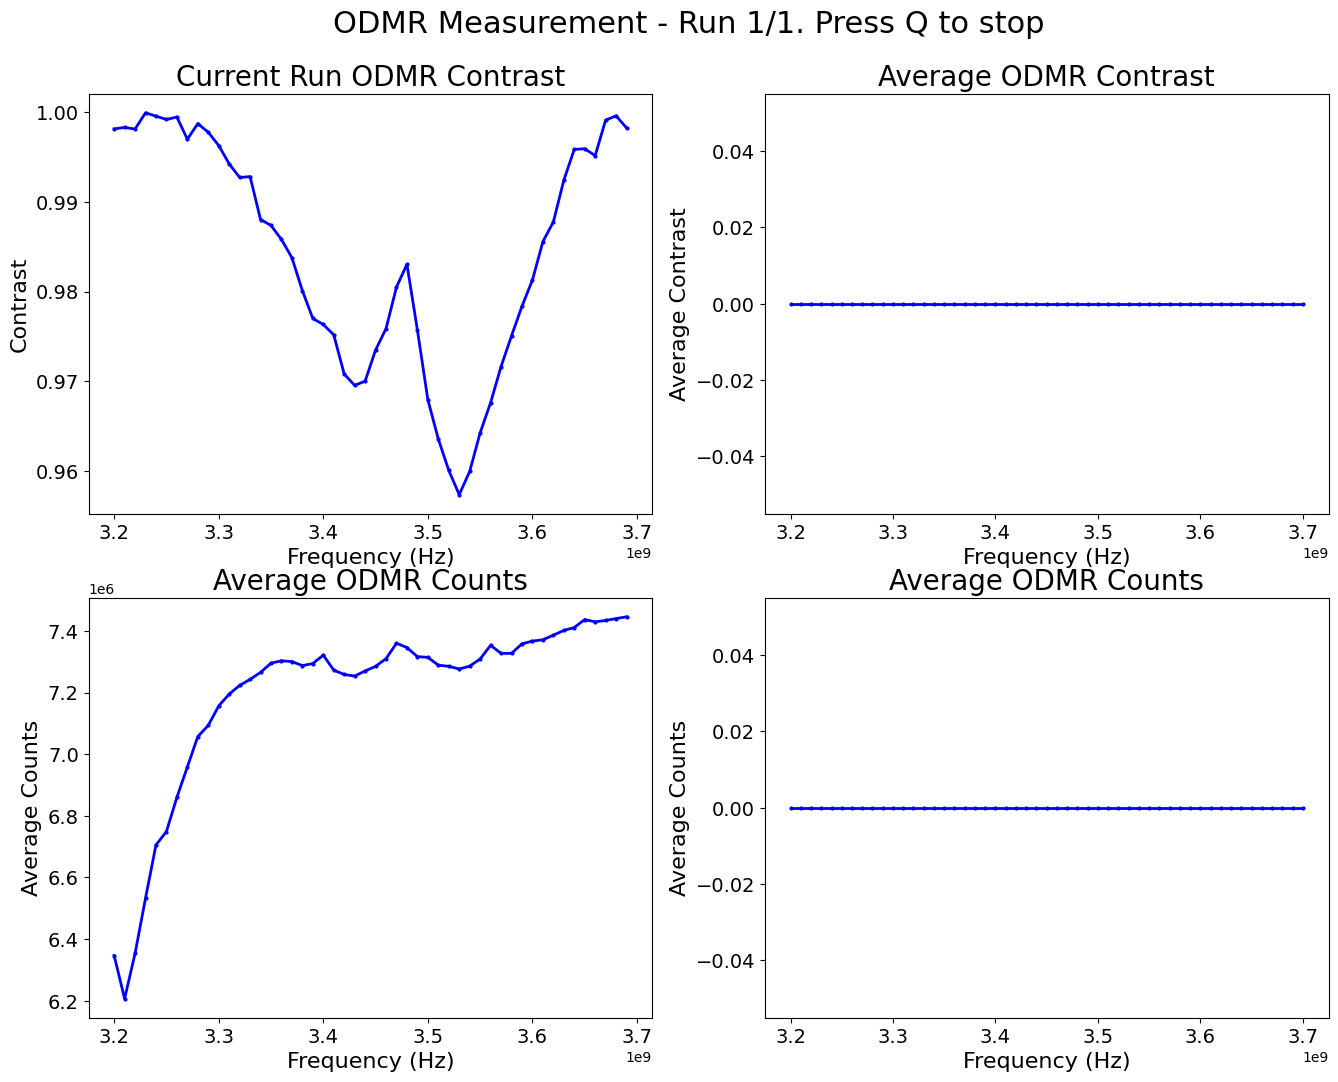

100%|██████████| 1/1 [00:51<00:00, 51.71s/it]


In [45]:
# 3. Run ODMR experiment
freqs = np.linspace(3.2e9, 3.7e9, num =51)
freq_range, avg_contrast, all_contrast, avg_counts, all_counts = odmr.run_frequency_sweep(freqs)


In [39]:
# 5. Close instruments when completely done
# sg386.close()
# rm.close()